# Task 2: Prediction using Unsupervised ML.

### Here, we will take the Iris dataset and divide it into clusters using the K-Means Clustering Algorithm.
### Done by : Mahesh Babu

### Step 1: Importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Step 2: Mapping the values {0,1,2} onto the names of the species.

In [3]:
di = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df.Species = df['Species'].map(di)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [4]:
df.shape

(150, 6)

In [5]:
df1 = df.drop(['Id', 'Species'], axis=1)
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
from sklearn.preprocessing import MinMaxScaler
mi = MinMaxScaler()
X = mi.fit_transform(df1)

### Step 3: Importing the K-means method from sklearn and fitting the data.

In [7]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### Step 4: Calculating and plotting the SSE using inertia of the trained examples.

In [8]:
sse = []
for i in range(1,10):
    km = KMeans(n_clusters = i)
    km.fit(X)
    sse.append(km.inertia_)
print(sse)

[41.13817202297779, 12.143688281579719, 6.9981140048267605, 5.5328310030819, 4.571923613060554, 3.9150575076663006, 3.4703457160439477, 3.136854193624041, 2.821682107082551]


### Step 5 : Finding Optimal number of clusters using Elbow Method

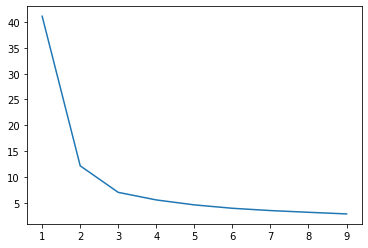

In [9]:
plt.plot(range(1,10), sse)

### Step 6: Training using optimal clusters

In [10]:
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(X)

### Step 7: Plotting the clusters and the centroids of the three categories.

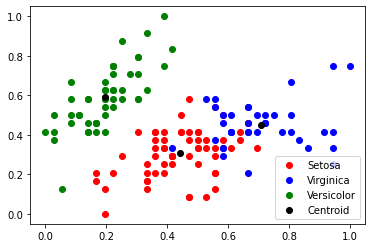

In [11]:
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],color='r', label='Setosa')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],color='b', label='Virginica')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],color='g', label='Versicolor')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', label='Centroid')
plt.legend(loc='best')